<a href="https://colab.research.google.com/github/engrdoc/JDA-Projects/blob/main/SQL_Python_RealDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Selected Socioeconomic Indicators in Chicago
The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal. 
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.
Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on the city of Chicago's website, but to summarize, the dataset has the following variables:

Community Area Number (ca): Used to uniquely identify each row of the dataset
Community Area Name (community_area_name): The name of the region in the city of Chicago
Percent of Housing Crowded (percent_of_housing_crowded): Percent of occupied housing units with more than one person per room
Percent Households Below Poverty (percent_households_below_poverty): Percent of households living below the federal poverty line
Percent Aged 16+ Unemployed (percent_aged_16_unemployed): Percent of persons over the age of 16 years that are unemployed
Percent Aged 25+ without High School Diploma (percent_aged_25_without_high_school_diploma): Percent of persons over the age of 25 years without a high school education
Percent Aged Under 18 or Over 64:Percent of population under 18 or over 64 years of age (percent_aged_under_18_or_over_64): (ie. dependents)
Per Capita Income (per_capita_income_): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population
Hardship Index (hardship_index): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.
'''

In [ ]:
'''
Connect to the database
Let us first load the SQL extension and establish a connection with the database
The following required modules are pre-installed in the Skills Network Labs environment. 
However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) 
you may need to install these libraries by removing the # sign before !pip in the code cell below.
'''

In [ ]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
# !pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
# !pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
# !pip install ipython-sql

In [ ]:
%load_ext sql

In [ ]:
#using Virali's code
%sql sqlite:///socioeconomic.db

'Connected: @socioeconomic.db'

In [ ]:
'''
Store the dataset in a Table
In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. 
To analyze the data using SQL, it first needs to be stored in the database.
We will first read the dataset source .CSV from the internet into pandas dataframe
Then we need to create a table in our Db2 database to store the dataset. 
'''
#The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a pandas dataframe into the table

In [ ]:
import pandas 
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

In [ ]:
chicago_socioeconomic_data.shape

(78, 9)

In [ ]:
%%sql SELECT * 
      FROM chicago_socioeconomic_data;

In [ ]:
#Q1: How many rows are in the dataset?
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [ ]:
#Q2:How many community areas in Chicago have a hardship index greater than 50.0? '''AS H.I._>_50'''
%sql SELECT COUNT(ca) AS 'H.I._>_50' FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


H.I._>_50
38


In [ ]:
#Q3: What is the maximum value of hardship index in this dataset?
%%sql SELECT MAX(hardship_index) AS 'MAX_H.I.'
      FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX_H.I.
98.0


In [ ]:
#Q4: Which community area has the highest hardship index?
%%sql SELECT ca, community_area_name, MAX(hardship_index) AS 'MAX_H.I.'
      FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,MAX_H.I.
54.0,Riverdale,98.0


In [ ]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [ ]:
#or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

 * sqlite:///socioeconomic.db
(sqlite3.OperationalError) near "NULLS": syntax error
[SQL: SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data )

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [ ]:
#Q5: Which Chicago community areas have per-capita incomes greater than $60,000?
%sql SELECT community_area_name, per_capita_income_ FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000 ORDER BY per_capita_income_ DESC;

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_
Near North Side,88669
Lincoln Park,71551
Loop,65526
Lake View,60058


In [ ]:
#Q6: Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
income_vs_hardship

 * sqlite:///socioeconomic.db
Done.


per_capita_income_,hardship_index
23939,39.0
23040,46.0
35787,20.0
37524,17.0
57123,6.0
60058,5.0
71551,2.0
88669,1.0
40959,8.0
32875,21.0


In [ ]:
#there is a null, 'NONE' value in the hardship_index

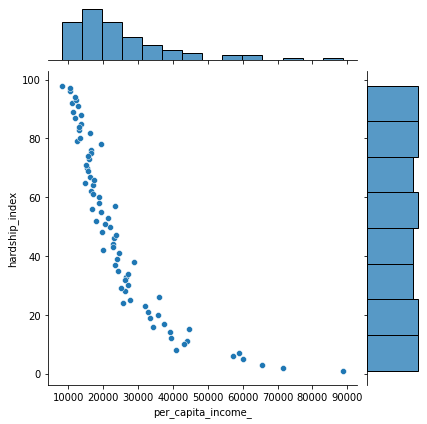

In [ ]:
plot = sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship.DataFrame())
# DataFrame should be written as Capital 'D' and 'F'

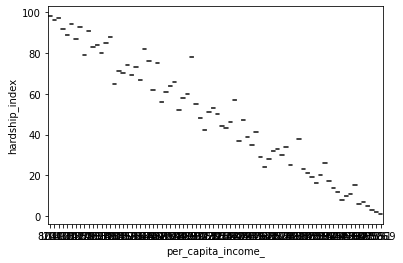

In [ ]:
plot = sns.boxplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship.DataFrame())